In [1]:
from numpy import count_nonzero
from fonctions import *

In [2]:
events = lire_donnees()

# Exploration des données

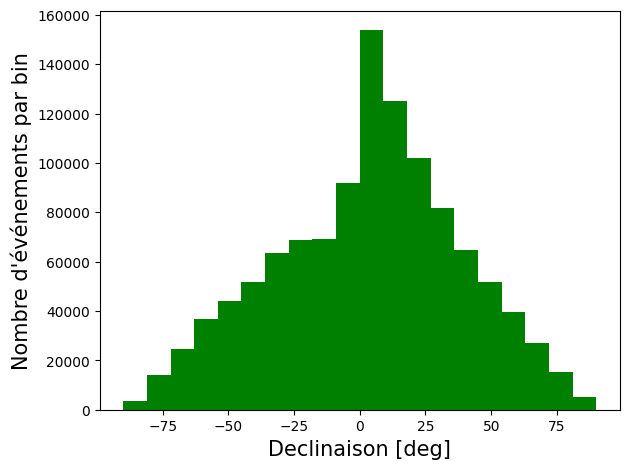

In [3]:
# histogramme en déclinaison
dessiner_histogramme(
    fichier_de_sortie="solution_histogramme_dec",
    variable=events["Dec[deg]"],
    nom="Declinaison [deg]",
    couleur="green",
    ax_min=-90, 
    ax_max=90,
)

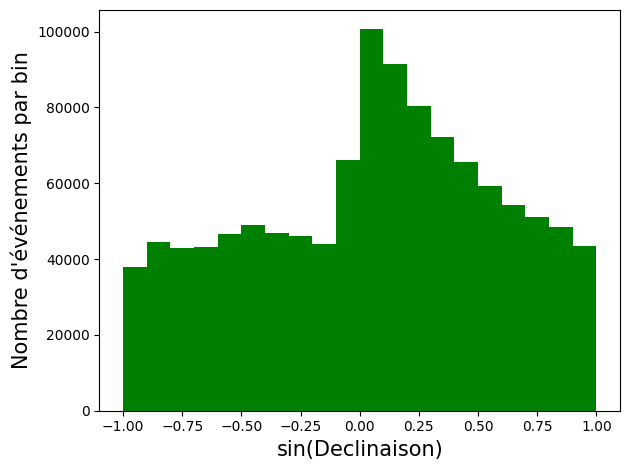

In [4]:
# histogramme en sinus de la déclinaison
dessiner_histogramme(
    fichier_de_sortie="solution_histogramme_sindec",
    variable=sin(events["Dec[deg]"]),
    nom="sin(Declinaison)",
    couleur="green",
    ax_min=-1, 
    ax_max=1,
)

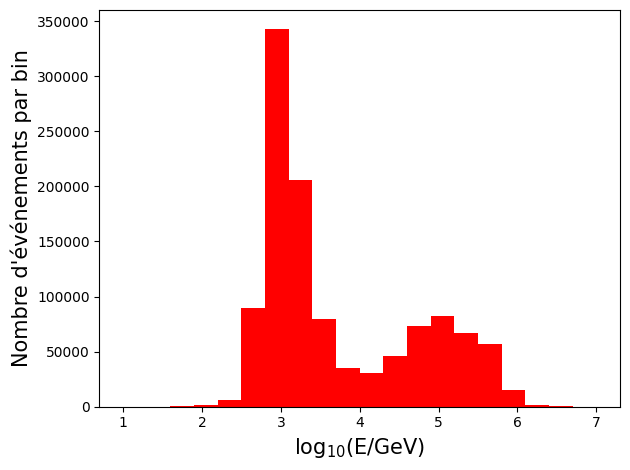

In [5]:
# histogramme en sinus de la déclinaison
dessiner_histogramme(
    fichier_de_sortie="solution_histogramme_energie",
    variable=events["log10(E/GeV)"],
    nom=r"log$_{10}$(E/GeV)",
    couleur="red",
    ax_min=1, 
    ax_max=7,
)

0.0 180.0 -180.0 180.0


<Figure size 640x480 with 0 Axes>

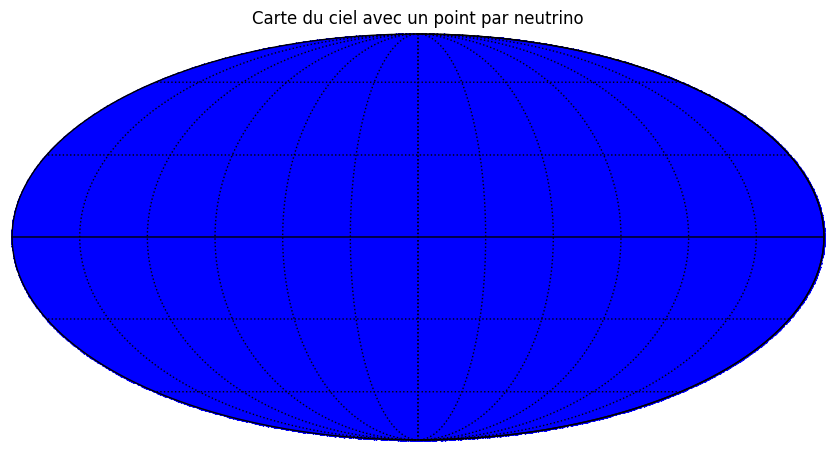

In [6]:
dessiner_carte(
    fichier_de_sortie="solution_carte_points",
    ra=events["RA[deg]"],
    dec=events["Dec[deg]"],
    couleur="Blue",
    titre="Carte du ciel avec un point par neutrino"
)

0.0 180.0 -180.0 180.0


<Figure size 640x480 with 0 Axes>

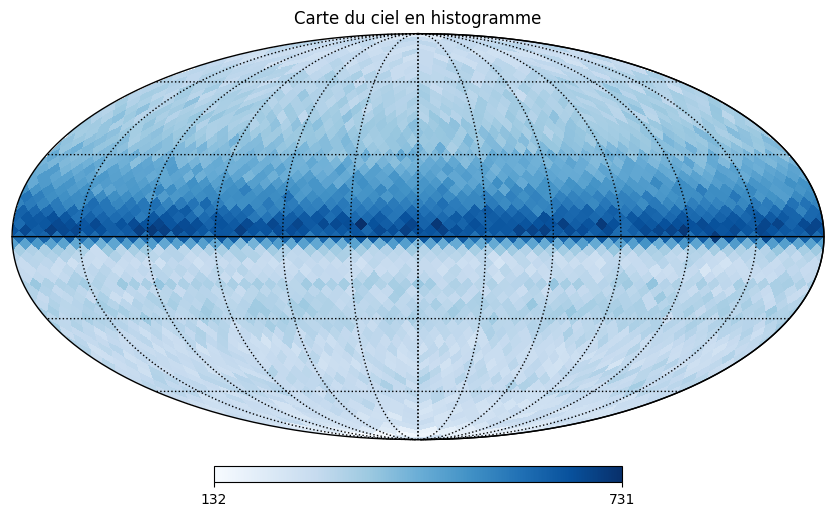

In [7]:
dessiner_carte_histogramme(
    fichier_de_sortie="solution_carte_histogramme",
    ra=events["RA[deg]"],
    dec=events["Dec[deg]"],
    echelle_couleur="Blues",
    titre="Carte du ciel en histogramme",
    resolution=4
)

# Recherche de neutrinos provenant d'une direction donnée

In [8]:
def calculer_cos_distance_angulaire(ra, dec, ra_source, dec_source):
    cos_delta_phi = cos(ra-ra_source) * cos(dec) * cos(dec_source) + sin(dec) * sin(dec_source)
    return cos_delta_phi

In [9]:
def analyse(nom_source, ra_source, dec_source):
    events["cos(DeltaPhi)"] = calculer_cos_distance_angulaire(
        ra=events["RA[deg]"],
        dec=events["Dec[deg]"],
        ra_source=ra_source,
        dec_source=dec_source
    )
    events["DeltaPhi"] = arccos(events["cos(DeltaPhi)"])
    events["DeltaPhi^2"] = events["DeltaPhi"] ** 2
    count_1 = count_nonzero((events["DeltaPhi^2"] < 1))
    count_2 = count_nonzero((events["DeltaPhi^2"] >= 1) & (events["DeltaPhi^2"] < 6))
    bruit_de_fond_5bins = count_2
    bruit_de_fond_attendu_premierbin = bruit_de_fond_5bins / 5
    signal_premierbin = count_1 - bruit_de_fond_attendu_premierbin
    Z = signal_premierbin/sqrt(count_1)
    # print("Bruit de fond attendu dans le premier bin =", bruit_de_fond_attendu_premierbin)
    # print("Excès dans le premier bin =", signal_premierbin, "=", Z, "sigma")
    dessiner_histogramme(
        fichier_de_sortie="histogramme_deltaphi_squared_" + nom_source,
        variable=events["DeltaPhi^2"],
        nom=r"$\Delta\Phi^2$[deg$^2$]",
        ax_max=9,
        nbBins=10,
        titre=nom_source
    )
    return Z

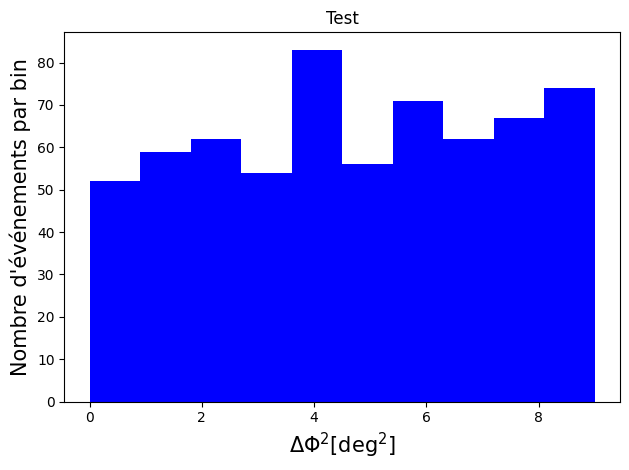

In [10]:
Z = analyse(nom_source="Test", ra_source=219.9, dec_source=60.8)

# Étude de plusieurs sources astrophysiques potentielles

Nom : PKS_1424+240 ; Z = 1.4907240068222314
Nom : 4C_+01.28 ; Z = -0.7074076136958765
Nom : TXS_0506+056 ; Z = 1.205438410291578
Nom : B2_1215+30 ; Z = 0.7313103409735254
Nom : PKS_1717+177 ; Z = 0.12623374885344102
Nom : PKS_0019+058 ; Z = -0.4086031347642003
Nom : PKS_0736+01 ; Z = 0.2075025899615813
Nom : PKS_0805-07 ; Z = 1.2521980673998825
Nom : M_31 ; Z = -0.96354608225636


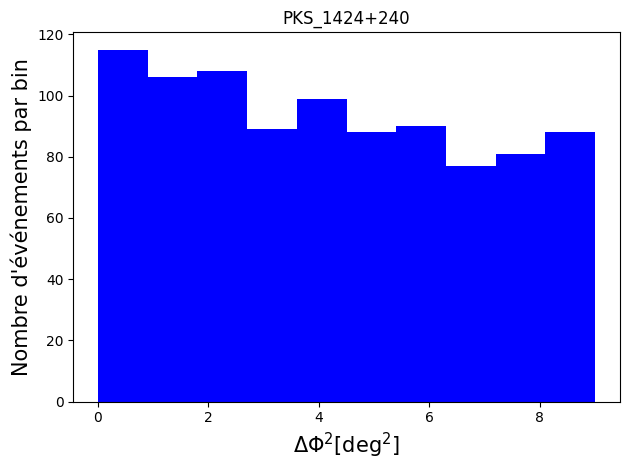

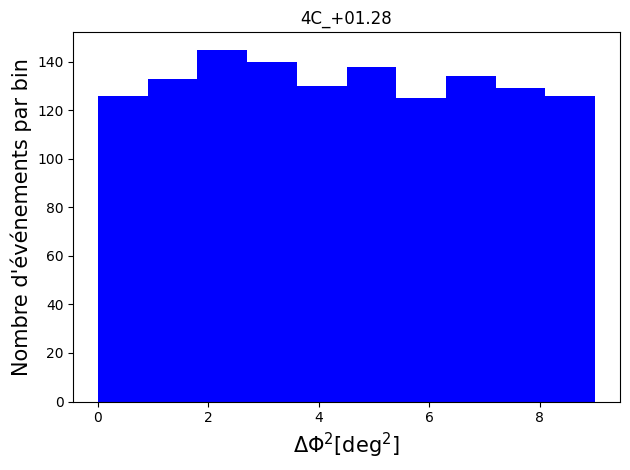

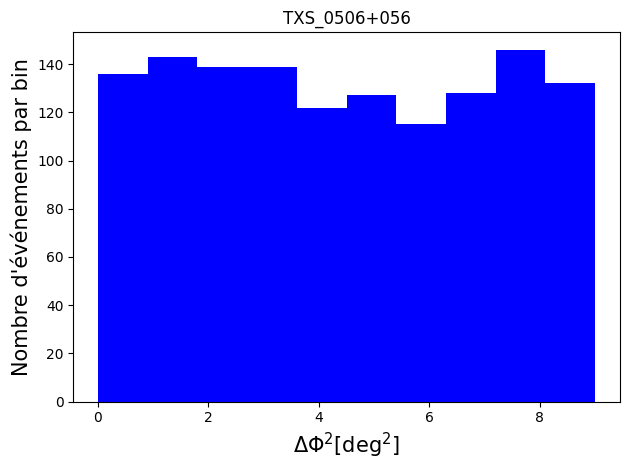

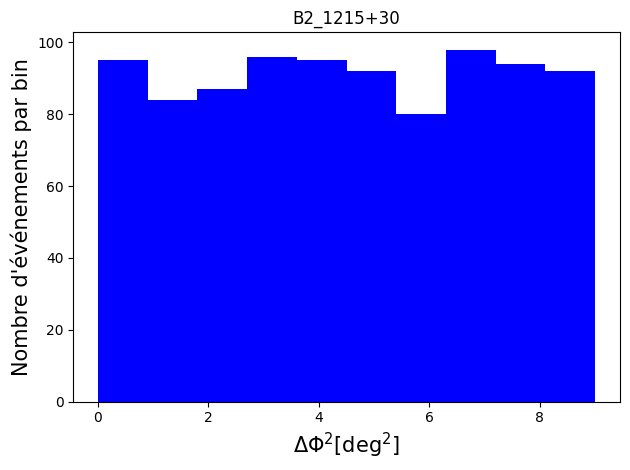

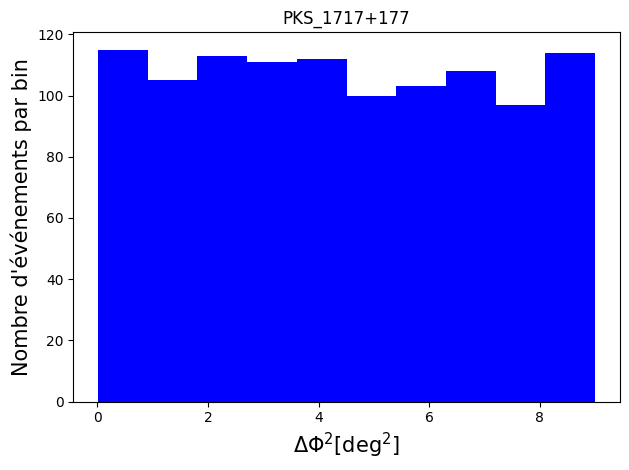

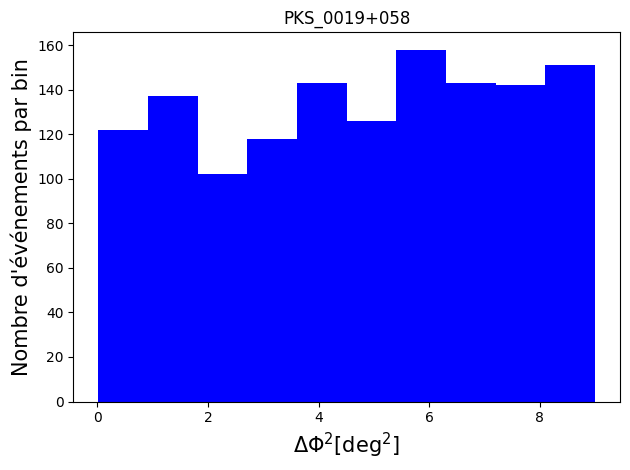

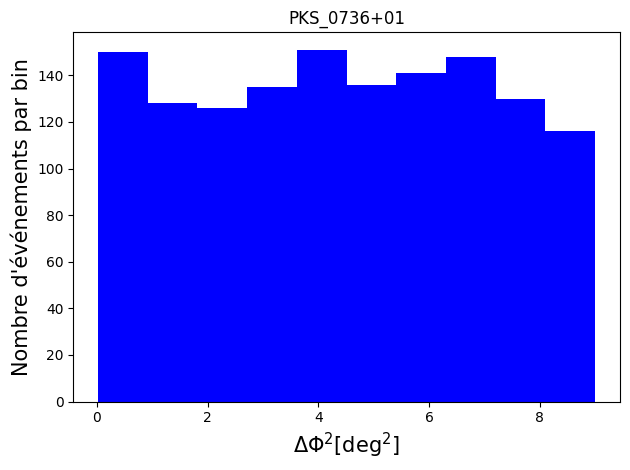

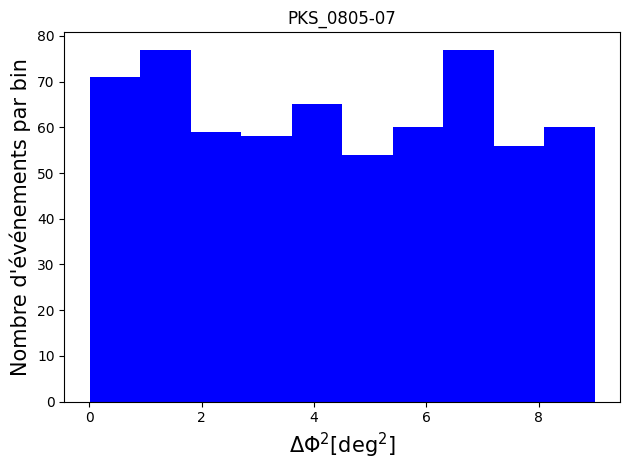

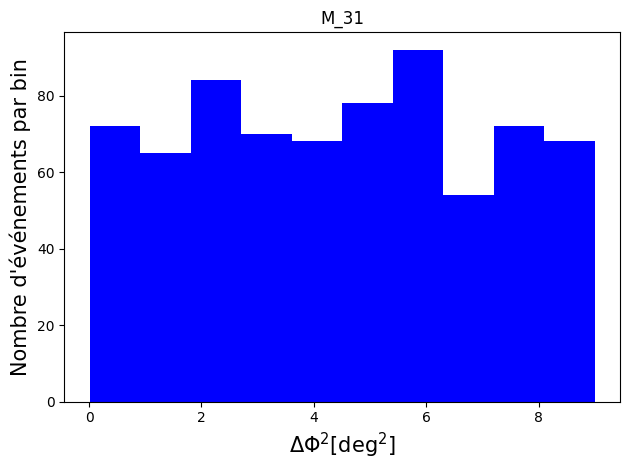

In [11]:
sources = liste_sources(groupe="A")
for source in sources:
    Z = analyse(nom_source=source["Nom"], ra_source=source["RA(source)"], dec_source=source["Dec(source)"])
    print("Nom :", source["Nom"], "; Z =", Z)